In [1]:
import healpy as hp
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
def radec_to_sph(ra,dc):
    
    theta = (90.-dc)*np.pi/180.
    phi   = ra*np.pi/180.
    return theta, phi

In [3]:
def plot_healpix(NSIDE,ra=None,dc=None,fname=None,coord=None,rot=None,title="",cmin=0,cmax=None,h=None):

    if rot is None:
        rot = [0,0,0]

    if ra is None and h is None:
        print("You need to provide either a list of coordinates or the h histogramed pixel list")
        return

    if h is None:
        #Convert to ra/dec
        theta, phi = radec_to_sph(ra,dc)
        #set up the healpix grid.
        n = hp.ang2pix(NSIDE, theta, phi)
        #Load up the healpix array and display it. 
        h = np.histogram(n,hp.nside2npix(NSIDE),
                         range=(0,hp.nside2npix(NSIDE)-1))[0]
        h = h.astype(np.float64)

    #Transform into a per degree scale.
    npix = hp.nside2npix(NSIDE)
    total_degrees_in_sky = 4.*np.pi*(180./np.pi)**2
    area_per_pixel = total_degrees_in_sky/(1.*npix)
    h /= area_per_pixel

    #Set the maximum density value for the color
    if cmax is None:
        cmax = np.ceil(np.percentile(h,99.9936)) #4 sigma

    hp.mollview(h,title=title.format(NSIDE),rot=rot,coord=coord,
                notext=True,min=cmin,max=cmax)
    hp.visufunc.graticule()
    #hp.projplot(eth,ephi,'w-',coord=coord)
    #hp.projplot(EP_th,EP_phi,'wo',coord=coord)
    #hp.projplot(IDF_th,IDF_phi,'kx',coord=coord)
    if fname is None:
        plt.show(block=True)
    else:
        plt.savefig(fname)

    return h



In [4]:
#Read the F-test catalog. 
Fcat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_F_test_AGN_full_photometry.fits")

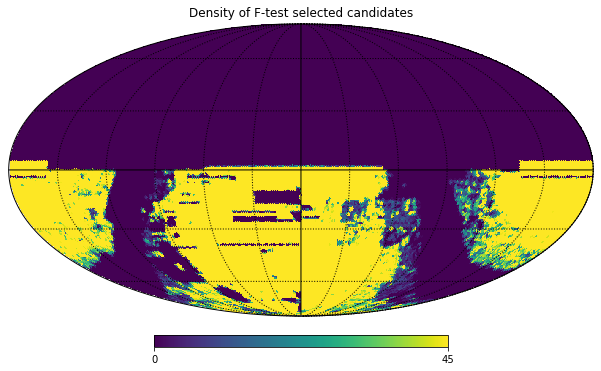

In [5]:
NSIDE=64
h = plot_healpix(NSIDE, ra=Fcat['ra'], dc=Fcat['dec'], cmax=45, title="Density of F-test selected candidates")

In [6]:
median_density = np.median(h[h>0])
print("The Median number of F-test selected AGN targets is {:.1f} per sq. deg.".format(median_density))

The Median number of F-test selected AGN targets is 97.7 per sq. deg.


In [7]:
#Load the low number of bands BIC catalog. We'll need this to find the gaps. 
BIC_cat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_BIC_AGN_nb_le_6_full_photometry.fits")

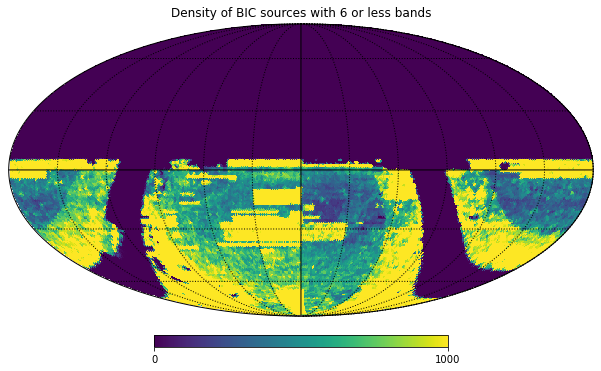

In [8]:
#Get their density plot. 
h_BIC = plot_healpix(NSIDE, ra=BIC_cat['ra'], dc=BIC_cat['dec'], cmax=1000, title="Density of BIC sources with 6 or less bands")

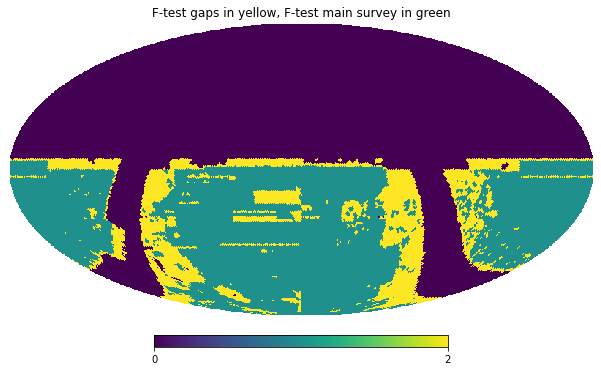

In [9]:
#Plot the gaps only. 
h_gaps = np.where(h<0.2*median_density, 2, 1)
h_gaps = np.where(h_BIC==0, 0, h_gaps)
hp.mollview(h_gaps, title="F-test gaps in yellow, F-test main survey in green")

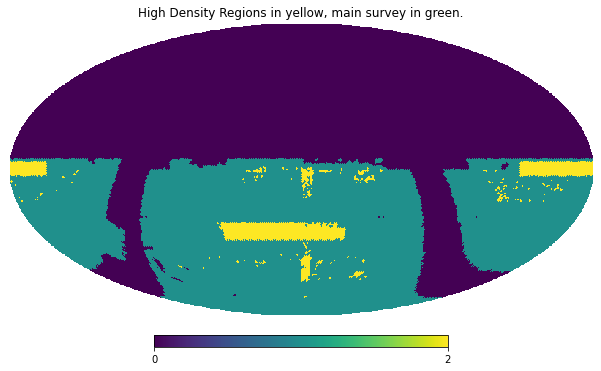

In [10]:
#Plot the high density fields (Vikings mostly) only. 
h_hdr = np.where(h>3*median_density, 2, 1)
h_hdr = np.where((h_BIC)==0, 0, h_hdr)
hp.mollview(h_hdr, title="High Density Regions in yellow, main survey in green.")

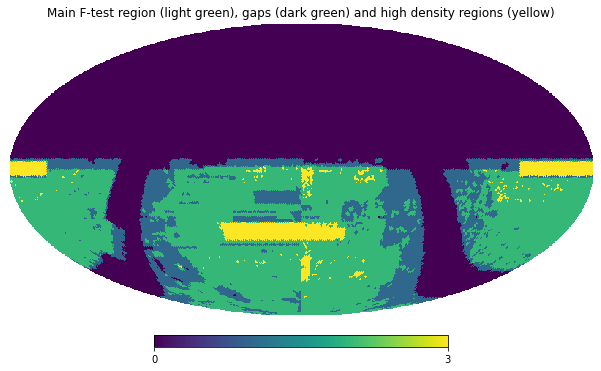

In [11]:
h_summary = np.where(h>3*median_density, 3, 2)
h_summary = np.where((h_BIC>0) & (h<0.2*median_density), 1, h_summary)
h_summary = np.where(h_BIC==0, 0, h_summary)
hp.mollview(h_summary, title="Main F-test region (light green), gaps (dark green) and high density regions (yellow)")

In [12]:
npix = hp.nside2npix(NSIDE)
total_degrees_in_sky = 4.*np.pi*(180./np.pi)**2
area_per_pixel = total_degrees_in_sky/(1.*npix)
np.sum(h[(h>0.2*median_density) & (h<3*median_density)])*area_per_pixel

1424719.0

In [13]:
#Load the low number of bands BIC catalog. We'll need this to find the gaps. 
Combined_cat = Table.read("./Master_Catalog.downselected.v1.1.fits")

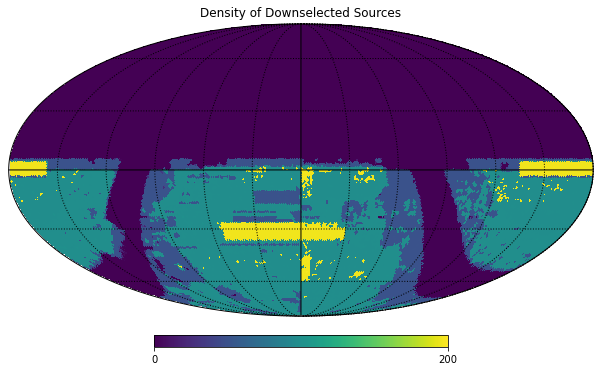

In [19]:
#Get their density plot. 
h_comb = plot_healpix(NSIDE, ra=Combined_cat['ra'], dc=Combined_cat['dec'], cmax=200, title="Density of Downselected Sources")